## 1. 데이터 로드하기

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [439]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [440]:
path = '/content/drive/My Drive/kidney_disease.csv'
df = pd.read_csv(path)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## 2. 데이터 살펴보기
- 데이터의 일반정보
- 데이터의 통계량
- 데이터의 shape

In [441]:
df.shape

(400, 26)

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [443]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


##3. 데이터의 전처리
결측치가 전체의 30% 이상인 경우 해당 열을 제거하시오.
결측치가 전체의 30% 미만인 경우, 평균값으로 대체하시오.

In [444]:
#어떤 열의 빈 값이 몇개인지 알아보는 함수
#해당 열의 공백 여부를 True, False로 인쇄함
#df['rbc'].isnull()

#해당 열의 공백이 총 몇개인지
df['rbc'].isnull().sum()

152

In [445]:
empty = [x for x in df.columns if df[x].isnull().sum() >= int(row*0.3)]

In [446]:
empty

['rbc', 'rc']

In [447]:
#columns = 열 이름으로 특정 열을 제거
df.drop(columns =  empty, inplace=True)

In [448]:
df.columns
#rbc, rc  열 사라짐

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'classification'],
      dtype='object')

In [449]:
mean_ = [x for x in df.columns
         if df[x].isnull().sum() < row*0.3
         and df[x].isnull().sum() != 0]

In [450]:
mean_

['age',
 'bp',
 'sg',
 'al',
 'su',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [451]:
#원래 평균값 대체였으나, object의 경우 평균을 낼 수 없으므로
#우선 최빈값 대체하였습니다.
for a in mean_:
  d_mode = df[a].mode()[0]
  df[a].fillna(d_mode, inplace=True)

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  htn             400 non-null    obj

### 4. 데이터의 전처리 2
- 데이터의 dtype이 'obejct' 인 경우,
  - 알맞은 인코딩을 수행하시오.

In [453]:
df['pcv'].unique()
# pcv 라는 열에\ 가 포함된 값이 존재하여 object로 인식, 정수로 변환시키기.

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
       '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [454]:
df['pcv'].replace("\t43", 0 , inplace=True)
df['pcv'].replace("\t?", 0 , inplace=True)

In [455]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
       '16', '24', '37', '30', '34', '40', '45', '27', '48', 0, '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [456]:
df['pcv'] = df['pcv'].astype(int)
mean = df['pcv'].mean()
df['pcv'].fillna(mean, inplace=True)

In [457]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
       '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
       '6300', '\t6200', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '\t8400', '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100', '\t?',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [458]:
df['wc'].replace("\t6200", 6200 , inplace=True)
df['wc'].replace("\t?", 0 , inplace=True)
df['wc'].replace("\t8400", 8400 , inplace=True)

In [459]:
df['wc'] = df['wc'].astype(int)
mean = df['wc'].mean()
df['wc'].fillna(mean, inplace=True)

In [460]:
df.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,15.4,44,7800,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,99.0,...,11.3,38,6000,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,9.6,31,7500,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,11.2,32,6700,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,11.6,35,7300,no,no,no,good,no,no,ckd


In [474]:
Y=df['classification']
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [462]:
ob = [x for x in df.columns if df[x].dtype=='object']

In [463]:
ob = ob[:-1]
#classification 제외

for o in ob:
  new_name = 'le' +o
  df[new_name] = le.fit_transform(df[o])
  df = pd.concat([df, df[new_name]], axis=1)

In [464]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [465]:
df.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,ledm,ledm,lecad,lecad,leappet,leappet,lepe,lepe,leane,leane
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,4,4,1,1,0,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,99.0,...,3,3,1,1,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,4,4,1,1,1,1,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,3,3,1,1,1,1,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,3,3,1,1,0,0,0,0,0,0


In [466]:
df.drop(columns=ob, inplace=True)

## 5. 데이터 준비하기
- train, test데이터를 7:3의 비율로 나누어보시오

In [475]:
from sklearn.model_selection import train_test_split
y = df['classification'].replace({'notckd': 0,'ckd\t':1, 'ckd': 1})

X = df.drop('classification', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 6. 최소 2개 이상의 모델링을 하여, 각 모델의 성능을 비교하시오.

In [476]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [477]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [478]:
from sklearn.metrics import accuracy_score
y_predict = dt.predict(X_test)

In [479]:
accuracy_score(y_test, y_predict)

0.9916666666666667

In [480]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [481]:
y_predict = rf.predict(X_test)

In [482]:
accuracy_score(y_test, y_predict)

1.0

### 심화 : 파이썬에 너무 익숙한 사람

- 시각화를 통해 데이터의 분포를 표현하시오(선택 1)

- 두 모델의 성능 지표를 시각화하여 표현하시오(선택 2)

In [487]:
target_list = df['lepc']
target_list.columns= ['t1','t2']

target_list = list(target_list['t1'])

([<matplotlib.patches.Wedge at 0x7cc2bb028be0>,
 [Text(-0.9097886363331099, 0.6182917088228989, 'normal'),
  Text(0.9097886363331099, -0.618291708822899, "['abnormal']")])

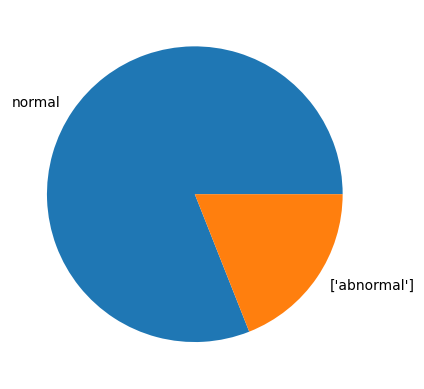

In [490]:
fig, ax= plt.subplots()
ax.pie([target_list.count(1), target_list.count(0)], labels=['normal',['abnormal']])

([<matplotlib.patches.Wedge at 0x7cc2bb0c9780>,
 [Text(1.0162674857624154, 0.4209517756015988, 'a'),
  Text(-0.42095177560159874, 1.0162674857624154, 'b'),
  Text(-2.0206672185931328e-16, -1.1, 'c')])

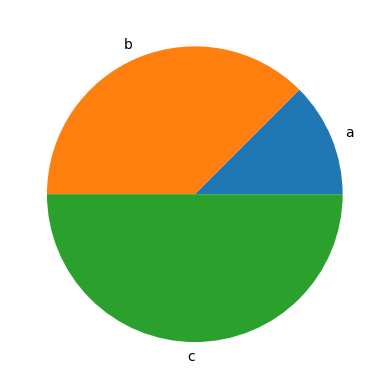

In [491]:
#파이 차트 예시
fig, ax = plt.subplots()
ax.pie([1,3,4], labels=['a','b','c'])